# 1. Perkenalan
## Nama : Raymond Samuel
## Batch : RMT-030
## Dataset : Mushroom
### Dataset url : https://archive.ics.uci.edu/dataset/73/mushroom
### Deployment url : https://huggingface.co/spaces/Raymond-Samuel/Milestone-2-Raymond-Samuel
## Objective :

# 2. Import Libraries

In [1]:
# !pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset import
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score

# 3. Data Loading

In [3]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets
df = pd.concat([X, y], axis=1)

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [4]:
# Define mapping dictionaries
cap_shape_dict = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_dict = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_dict = {'t': 'bruises', 'f': 'no'}
odor_dict = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_dict = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_dict = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_dict = {'b': 'broad', 'n': 'narrow'}
gill_color_dict = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape_dict = {'e': 'enlarging', 't': 'tapering'}
stalk_root_dict = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring_dict = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring_dict = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_dict = {'p': 'partial', 'u': 'universal'}
veil_color_dict = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_dict = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_dict = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_dict = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_dict = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat_dict = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
poisonous_dict = {'e': 'edible', 'p': 'poisonous'}

# Apply the mapping to the dataframe
df['cap-shape'] = df['cap-shape'].map(cap_shape_dict)
df['cap-surface'] = df['cap-surface'].map(cap_surface_dict)
df['cap-color'] = df['cap-color'].map(cap_color_dict)
df['bruises'] = df['bruises'].map(bruises_dict)
df['odor'] = df['odor'].map(odor_dict)
df['gill-attachment'] = df['gill-attachment'].map(gill_attachment_dict)
df['gill-spacing'] = df['gill-spacing'].map(gill_spacing_dict)
df['gill-size'] = df['gill-size'].map(gill_size_dict)
df['gill-color'] = df['gill-color'].map(gill_color_dict)
df['stalk-shape'] = df['stalk-shape'].map(stalk_shape_dict)
df['stalk-root'] = df['stalk-root'].map(stalk_root_dict)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(stalk_surface_above_ring_dict)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(stalk_surface_below_ring_dict)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(stalk_color_above_ring_dict)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(stalk_color_below_ring_dict)
df['veil-type'] = df['veil-type'].map(veil_type_dict)
df['veil-color'] = df['veil-color'].map(veil_color_dict)
df['ring-number'] = df['ring-number'].map(ring_number_dict)
df['ring-type'] = df['ring-type'].map(ring_type_dict)
df['spore-print-color'] = df['spore-print-color'].map(spore_print_color_dict)
df['population'] = df['population'].map(population_dict)
df['habitat'] = df['habitat'].map(habitat_dict)
df['poisonous'] = df['poisonous'].map(poisonous_dict)


# 4. EDA

In [5]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


# 5. Feature Engineering

## Handling Cardinality

In [6]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,cap-shape,6,"[convex, bell, sunken, flat, knobbed, conical]"
1,cap-surface,4,"[smooth, scaly, fibrous, grooves]"
2,cap-color,10,"[brown, yellow, white, gray, red, pink, buff, purple, cinnamon, green]"
3,bruises,2,"[bruises, no]"
4,odor,9,"[pungent, almond, anise, none, foul, creosote, fishy, spicy, musty]"
5,gill-attachment,2,"[free, attached]"
6,gill-spacing,2,"[close, crowded]"
7,gill-size,2,"[narrow, broad]"
8,gill-color,12,"[black, brown, gray, pink, white, chocolate, purple, red, buff, green, yellow, orange]"
9,stalk-shape,2,"[enlarging, tapering]"


## Handling missing value

In [7]:
X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Column `stalk-root` memiliki 2480 Missing value sehingga sebaiknya tidak digunakan.

In [8]:
X = X.drop(columns=['stalk-root'], axis=1)

In [9]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Splitting Between Train-set and Test-set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train_size: ' , X_train.shape)
print('Test_size: ', X_test.shape)

Train_size:  (6499, 21)
Test_size:  (1625, 21)


## Encoding

Columns object berisi nilai categorical / binary multi class sehingga encoding digunakan OHE untuk X.

In [11]:
# One-hot encoding
onehot_encoder = OneHotEncoder()
# onehot_encoded = onehot_encoder.fit_transform(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])

# Ubah label 'e' dan 'p' menjadi 0 dan 1
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RaymondS\anaconda3\envs\Phase1\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## PCA

In [12]:
# pca = PCA()
# pca.fit(X_scaled)

In [13]:
# # Plot the Cummulative of Explained Variance Ratio
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
# plt.grid()
# plt.plot(range(1, 4), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel('Number of components')
# plt.ylabel('Explained Variance Ratio - Cummulative')

# # Plot the Eigenvalues
# plt.subplot(1, 2, 2)
# plt.grid()
# plt.plot(range(1, 4), pca.explained_variance_ )
# plt.xlabel('Number of components')
# plt.ylabel('Eigenvalues')

## Column Transformer

In [14]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
# ('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

In [54]:
X_train.shape

(6499, 21)

# Modelling

In [15]:
#Making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC()),
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# Base Model Eval

## SVM

In [16]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [17]:
y_logreg_pred = pipe_svm.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [18]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



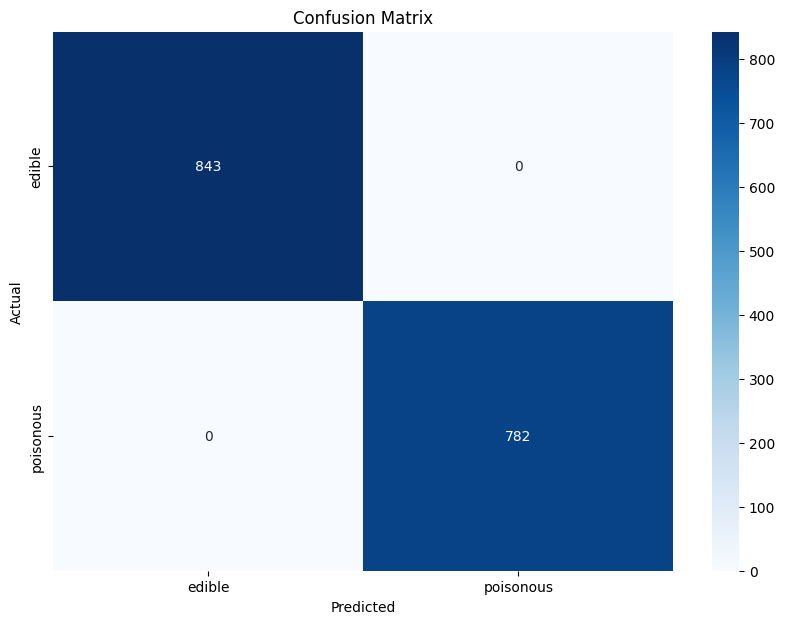

In [19]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_logreg_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=target, columns=target)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Decision Tree

In [21]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [22]:
y_logreg_pred = pipe_dt.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [23]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
#Cross Validation
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Random Forest

In [25]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [26]:
y_logreg_pred = pipe_dt.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [27]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [28]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## XGBoost

In [29]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  1.0


In [30]:
y_logreg_pred = pipe_xgb.predict(X_test)
y_logreg_pred

array([0, 1, 1, ..., 1, 1, 1])

In [31]:
target = ['edible', 'poisonous']
print(classification_report(y_test, y_logreg_pred, target_names = target))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [32]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


## Best Model Comparison

In [33]:
models = {
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [34]:
df_model

,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,1.0,1.0,1.0,1.0
F1-Score,1.0,1.0,1.0,1.0


In [35]:
models = {
    'SVM' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [36]:
df_cross_val

,SVM,Decision Tree,Random Forest,XGBoost
Mean,1.0,1.0,1.0,1.0
Std,0.0,0.0,0.0,0.0


# Model Optimization Eval

## SVM

In [37]:
param_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)

In [38]:
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))

best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

print(classification_report(y_test, best_pipe_svm.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001413CECA540>)])),
                ('classifier', SVC(C=1, gamma=1))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma',
       'param_classifier__kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy           

## Decision Tree

In [39]:
param_dt = {
    'classifier__max_depth': np.arange(3, 10),
    'classifier__min_samples_split': np.arange(2, 5)
}
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [40]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

print(classification_report(y_test, best_pipe_dt.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__max_depth': 9, 'classifier__min_samples_split': 2}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001413D7651F0>)])),
                ('classifier', DecisionTreeClassifier(max_depth=9))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                 

## Random Forest

In [41]:
##Parameter Tuning
param_rf = {
    'classifier__n_estimators' : np.arange(200,401, 100),
    'classifier__max_depth' : np.arange(4,8,2)
}
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [42]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

print(classification_report(y_test, best_pipe_rf.predict(X_test)))

Train Set Score :  0.9959993845206955
Test Set Score :  0.9987692307692307
{'classifier__max_depth': 6, 'classifier__n_estimators': 300}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001413E6452E0>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=300))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00    

## XGB

In [43]:
param_xgb = {
    'classifier__n_estimators': np.arange(100, 501, 200), 
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': np.arange(3, 7)
}
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

In [44]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

Train Set Score :  1.0
Test Set Score :  1.0
{'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 500}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('encoding', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001413E669CD0>)])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_roun...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
          

# Model After Tuning Comparison

In [46]:
models = {
    'SVM' : best_pipe_svm,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [47]:
df_model

,SVM,Decision Tree,Random Forest,XGBoost
Accuracy,1.0,1.0,1.0,1.0
F1-Score,1.0,1.0,1.0,1.0


# Model Saving

In [48]:
import pickle

pickle.dump(best_pipe_rf, open('deployment/model.pkl', 'wb'))

In [49]:
df.head(1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous


# Conceptual Problems
Jawab pertanyaan berikut:

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Jelaskan apa yang dimaksud dengan Cross Validation !